# Election Statis

$H_0$: There is no relationship between campaign funding and winning

$H_1$: There is a relationship between campaign funding and winning

I suspect there is no relationship anymore, and that it would be a negative relationship if you look at only recent data.

In [79]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
elfd = pd.DataFrame(
    {"Republican" : [1452617443, 1087909269, 433392727, 628140123,  701469440, 367228819],
     "Democrat"   : [2001292139, 1624301628, 769879088, 813649144, 1474505205, 328479256]},
      index =             [2024,       2020,      2016,      2012,       2008,      2004]
)

elfd["spend_diff"] = elfd["Democrat"] - elfd["Republican"]

# 1 == win, 0 == loss
elfd["Democrat_pred_win"] = np.where(elfd["Democrat"] > elfd["Republican"], 1, 0)
elfd["Democrat_act_win"]  = [0, 1, 0, 1, 1, 0]

# elfd = elfd.reset_index()

elfd

,Republican,Democrat,spend_diff,Democrat_pred_win,Democrat_act_win
2024,1452617443,2001292139,548674696,1,0
2020,1087909269,1624301628,536392359,1,1
2016,433392727,769879088,336486361,1,0
2012,628140123,813649144,185509021,1,1
2008,701469440,1474505205,773035765,1,1
2004,367228819,328479256,-38749563,0,0


        Party      Funding Democrat_act_win  Year
0  Republican  1452.617443              win  2024
1  Republican  1087.909269             loss  2020
2  Republican   433.392727              win  2016
3  Republican   628.140123             loss  2012
4  Republican   701.469440             loss  2008


Text(0.5, 0.98, 'Republican and Democrat Win/Loss per Spending')

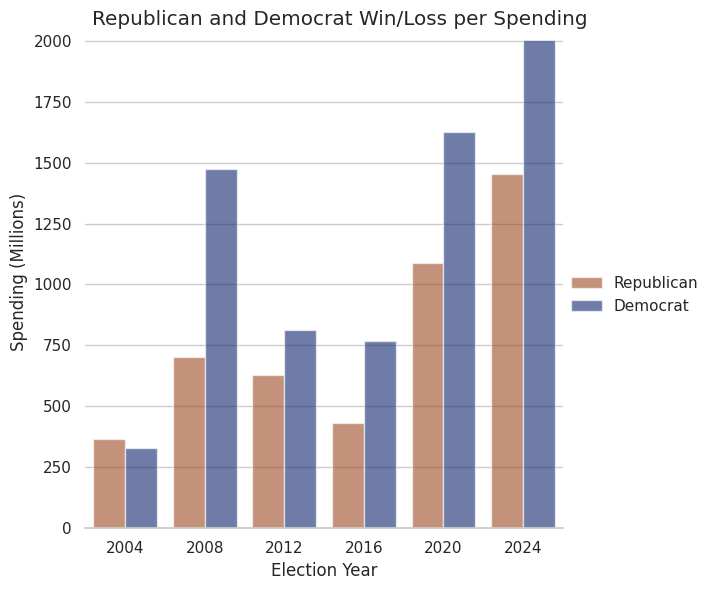

In [114]:
ndf = pd.melt(elfd).head(12).rename(columns={"variable": "Party"}).rename(columns={"value": "Funding"})
ndf["Funding"] = ndf["Funding"] / 1000000 # In millions now
ndf["Democrat_act_win"] = [0,1,0,1,1,0,0,1,0,1,1,0]
ndf["Democrat_act_win"] = np.where(ndf["Democrat_act_win"] == 0, "win", "loss")
ndf["Year"] = [2024, 2020, 2016, 2012, 2008, 2004, 2024, 2020, 2016, 2012, 2008, 2004]

print(ndf.head(5))

sns.set_theme(style="whitegrid")
reversed_palette = sns.color_palette("dark", 2)[::-1]

g = sns.catplot(
    data=ndf, kind="bar",
    x="Year", y="Funding", hue="Party",
    errorbar="sd", palette=reversed_palette, alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Election Year", "Spending (Millions)")
g.legend.set_title("")
g.fig.suptitle("Republican and Democrat Win/Loss per Spending")

Text(0.5, 0.98, 'Republican and Democrat Win/Loss per Spending')

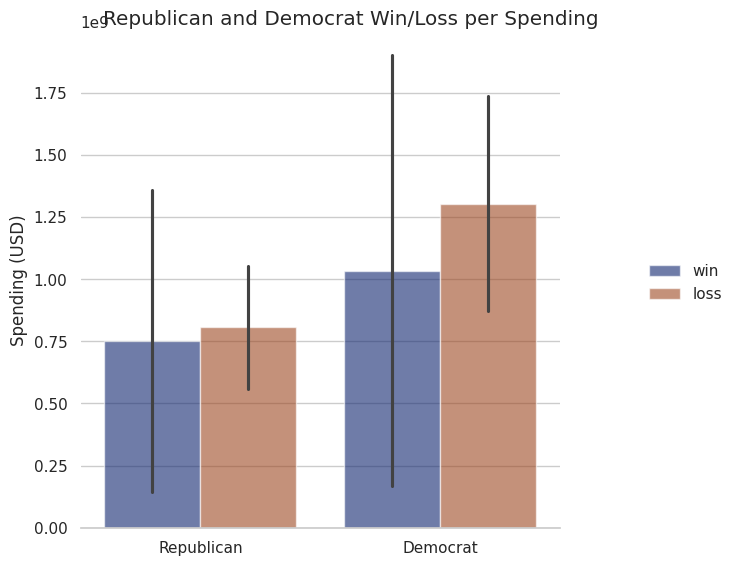

In [ ]:
ndf = pd.melt(elfd).head(12).rename(columns={"variable": "Party"}).rename(columns={"value": "Funding"})
ndf["Democrat_act_win"] = [0,1,0,1,1,0,0,1,0,1,1,0]
ndf["Democrat_act_win"] = np.where(ndf["Democrat_act_win"] == 0, "win", "loss")

sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=ndf, kind="bar",
    x="Party", y="Funding", hue="Democrat_act_win",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Spending (USD)")
g.legend.set_title("")
g.fig.suptitle("Republican and Democrat Win/Loss per Spending")

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


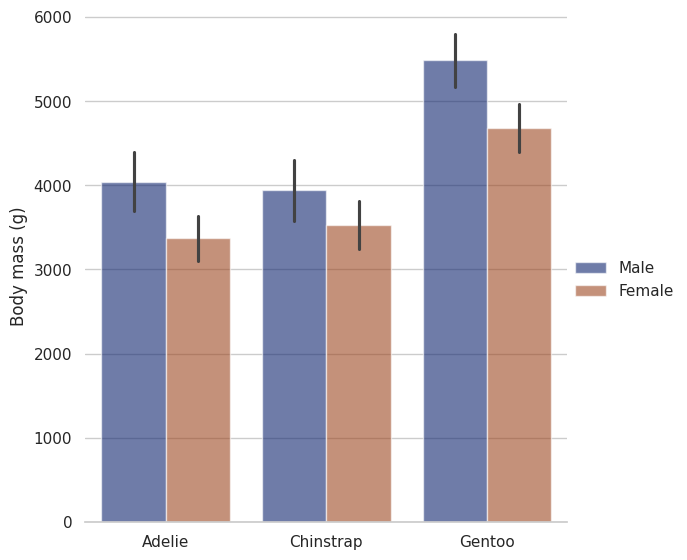

In [74]:
sns.set_theme(style="whitegrid")
penguins = sns.load_dataset("penguins")
print(penguins.head(5))

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

# Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
r_funds = elfd["Republican"].to_numpy()
d_funds = elfd["Democrat"].to_numpy()

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Point‐Biserial Correlation

Here, we consider a p-value < 0.05 as statistically significant, and a p-value < 0.01 as highly statistically significant. I high value, such as 0.99, would indicate the null hypothesis is correct, which is what we're expecting.

A negative r-value suggests the correlation is inverted.

 - $r$ = 0.1 to 0.3 might suggest a weak negative correlation.
 - $r$ = 0.3 to 0.7 could be interpreted as a moderate negative correlation.
 - $r$ = 0.7 to 1.0 would indicate a strong negative correlation.

In [27]:
from scipy.stats import pointbiserialr

In [49]:
elfd_3 = elfd.head(4)
elfd_tail_3 = elfd.tail(3)

print("Top 4")
r, p_value = pointbiserialr(elfd_3['Democrat_act_win'], elfd_3['spend_diff'])
print("r:", r)
print("r^2:", r**2)
print("p_value:", p_value)

print("\nAll Data")
r, p_value = pointbiserialr(elfd['Democrat_act_win'], elfd['spend_diff'])
print("r:", r)
print("r^2:", r**2)
print("p_value:", p_value)

print("\nOldest 3 Elections")
r, p_value = pointbiserialr(elfd_tail_3['Democrat_act_win'], elfd_tail_3['spend_diff'])
print("r:", r)
print("r^2:", r**2)
print("p_value:", p_value)

Top 4
r: -0.2709952471611911
r^2: 0.07343842398395506
p_value: 0.7290047528388088

All Data
r: 0.4076451887498613
r^2: 0.16617459991091002
p_value: 0.42240235494826583

Oldest 3 Elections
r: 0.7134195727706234
r^2: 0.5089674868122188
p_value: 0.4942908144864412


# T-Test

Used to guage whether the response between two groups is statistically significant.